## Satunnaisliike

Satunnaisliike mallintaa hiukkasen liikettä, joka törmäilee jatkuvastu muiden hiukkasten kanssa. Kuvittele esimerkiksi pölyhiukkanen ilmassa. Hiukkasen liikettä voidaan idealisoida seuraavasti:

* $X_t$ *riippuu* vain edellisistä ajoista
* $t\to X_t$ on jatkuva
* $X_s-X_t$:llä on *sama jakauma* kuiin $X_{s-t}$:llä kun $s>t$
* $X_{s}-X_{t}$ ja $X_{s'}-X_{t'}$ ovat keskenään *riippumattomia* jos $[s,t]\cap [s',t']=\emptyset$.
* $X_t$:n *odotusarvo* on aina nolla.
* $X_1$:n varianssi on $1$.

Näillä oletuksilla on vain yksi satunnainen prosessi, joka mallintaa kyseistä liikettä: Brownin liike.

Jotta tällaista prosessia voisi kuvailla, on meidän kuitenkin määriteltävä käsitteet *riippua*,*odotusarvo*,*varianssi* ja *sama jakauma*. Meidän on myös määriteltävä, mikä *X_t* on, ja minkälaisia kysymyksiä me voimme tästä prosessista tutkia. Toisaalta voimme myös käyttää tämän kurssin käsitteitä, ja osoittaa niiden avulla prosessin ominaisuuksia, kuten lauseen, että

**Lause** $X_1 \sim N(0,1)$, missä $N(0,1)$ on normaalijakautunut muuttuja.

**Lause** $X_t \sim N(0,t)$, missä $N(0,1)$ on normaalijakautunut muuttuja, jonka varianssi on t.

Emme kehitä kaikkea käsitteistöä tällä kurssilla, mutta tavoitteemme on pystyä käsittelemään tällaisia ilmiöitä, ja että voit jatkaa esimerkiksi stokastisten prosessien kurssille ja tutustua tarkemmin näihin prosesseihin.


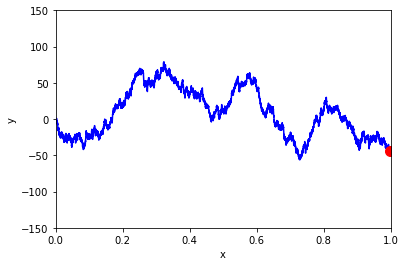

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import random

n = 10000
T = 1
x = np.linspace(0, T, n)
S = [random.randint(0,1)*2-1 for k in range(n)]

y = [0 for k in range(n)]

for k in range(1,n):
    y[k]=y[k-1]+S[k]

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the random line

rand_line, = plt.plot([], [], 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 1])
plt.ylim([-150,150])

# Update the frames for the movie
with writer.saving(fig, "test-BM.mp4", 90):
    for i in range(int(n/10)):
        x0 = x[i*10]
        y0 = y[i*10]
        red_circle.set_data(x0, y0)
        rand_line.set_data(x[0:i*10], y[0:i*10])
        writer.grab_frame()

In [3]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="test-BM.mp4" type="video/mp4">
</video></div>""")